In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("2023_W10_Workshop.ipynb")

# COMP SCI 1015 IAP - W10 - Workshop

## Introduction
From the video lecture, you should already know the following terms: ***variable scope, LEGB, Local, Global, Enclosing, Built-in, global and nonlocal keywords, mutable and immutable***. If you are unsure about any of these terms, you should watch the video more carefully. 

---
## Demo 1 - Access variables

Python uses **LEGB** variable scope: **L**ocal/**E**nclosing/**G**lobal/**B**uilt-in. In previous workshops, we have briefly covered the **global** namespace. The examples below further shows variables in different scopes and how to modify them.

In [ ]:
x = 'global x'                  # x is global

def foo():
    y = 'local y'
    print(f'Inside foo(): {x}') # x is global, thus is visible/accessible in foo() 
    print(f'Inside foo(): {x}') # y is local, thus is visible/accessible in foo() 

foo()
print(f'Inside main: {x}')
print(f'Inside main: {y}') # y is only visible inside foo(), thus the error

### Enclosing 

**Enclosing scope** is only used in the nested functions. Below is an example with nested functions. Please go through the code carefully and make sure you understand the order of execution. Ask yourself, why the variable **a** at line 4 is accessible?

In [ ]:
a = 'a1'          # local to main (or global)

def outer():  
    a = 'a2'        # local to outer() and enclosing to inner()

    def inner():
        a = 'a3'    # local to inner()
        print(f'Inside inner(): {a}')

    inner()              
    print(f'Inside outer(): {a}') 


outer()
# print(f'In main: {a}')

### Updater variables 

So far we talked about **reading** the variables at different scopes. **How about updating them?** The **LEGB** principle still applies, but sometimes it could be confusing when you have same variable names in different scopes as shown in the activity above. 

### `global` keyword 

To fix it, we can use the `global` keyword. Doing so specifically instructs Python to look for the variable `x` in the **global** scope instead of **local** scope. 

In [ ]:
x = 5

def inc_x():
    global x # access the global variable x
    x = x + 1
    print(f'Inside inc_x(): {x}')
    
inc_x()
inc_x()
inc_x()
print(f'Inside main: {x}')

### `nonlocal` keyword 

Similarly, you can **access** and **manipulate** variables in the **nonlocal** scope with the `nonlocal` keyword.

In [ ]:
def outer():    
    a = 1              # local to outer()
    b = 1              # local to outer()
    
    def inner():
        a = 5          # local to inner()
        nonlocal b     # nonlocal to inner(). The same b as declared in outer(). We can manipulate b.
        b = b + 1
        print(f'Inside inner(): a = {a} and b = {b}')
        
    inner()
    print(f'Inside outer(): a = {a} and b = {b}') # value of a hasn't changed

outer()

---
## Activity 1

<!-- BEGIN QUESTION -->

- In the first cell: Use `global` or `nonlocal` keywords at line 6 to make the program print out `5`
- In the second cell, Use `global` or `nonlocal` keywords at line 4 and 7 to make the program print out `10`.

In [2]:
y = 1

def foo():
    y = 2
    def bar():
        # INSERT YOUR CODE
        nonlocal y
        y = y + 3
        print(y)
    bar()
foo()

5


In [6]:
x = 1

def foo():
    # INSERT YOUR CODE
    global x
    x = 5
    def bar():
        # INSERT YOUR CODE
        global x
        x = x * 2
    bar()
    
foo()
print(x) # print out 10

10


<!-- END QUESTION -->

---
## Demo 2 - Mutable and Immutable 

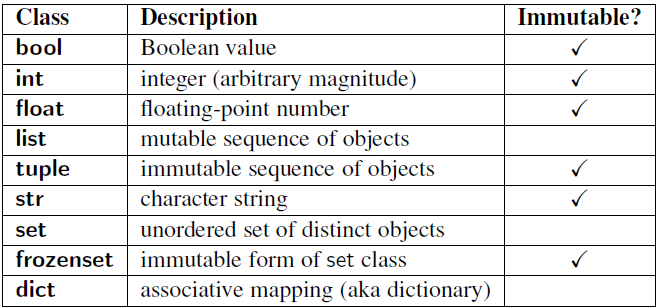

Everything in Python is an object. Objects are either **mutable** or **immutable**. 
- We **can** change the value of a **mutable** object after it is created.
- We **cannot** change the value of an **immutable** object after it is created.

In [ ]:
ps = {1, 2, 3}             # this is a set
ps.add(1000)
print(ps)

dic = {'key1':1, 'key2':2} # this is a dictionary
dic['key1'] = 1000
print(dic)

li = [1, 2, 3]             # this is a list
li[0] = 1000
print(li)

tu = (1, 2, 3)             # this is a tuple (ordered like a list)
tu[0] = 1000
print(tu)

### Wait, why is Integer immutable!? 

You might be wondering, why is an integer immutable? We can certainly do the following no?

In [ ]:
a = 10
b = 10

Yes, but what the code above does is to assign different integer values to a variable. The value of the variable `a` was initially `0`, then `10`. 

Python uniquely handles these immutable values. When we write `a = 10`, Python allocates a memory space with a value of `10` (in binary of course), then link the variable `a` to that value. 

If we use the **container** metaphor, you can think it as having a box with the content of `10`, then put a label `a` on it. The benefit of such system is that when we create another variable `b`, we do not need to create another *box*, we just need to put another label `b` onto the box.

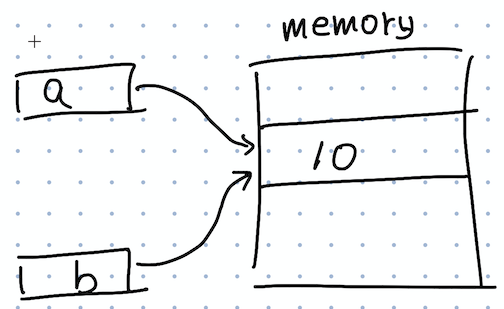

In fact, you can use the `id()` function to confirm that both variables `a` and `b` are pointing to the same integer value:

In [ ]:
a = 10
print(id(a))
b = 10
print(id(b))
# a = 20
# print(id(a))

### Referencing mutable objects 

Now, always be very careful when you refernece a mutable object, such as a **list**. See the example below: 

In [ ]:
list1 = ['x', 'y', 'z']
list2 = list1

list1[0] = 't'
# list2[0] = 'o'

print(f'list1 = {list1}')
print(f'list2 = {list2}') # are you expecting list2 to be ['t', 'y', 'z'] or ['x', 'y', 'z']?

Note that when we update the element of list1, the value of list2 also changes! This is because both list1 and list2 are referencing the same list object. **That is, the are both the labels on a same container box!**

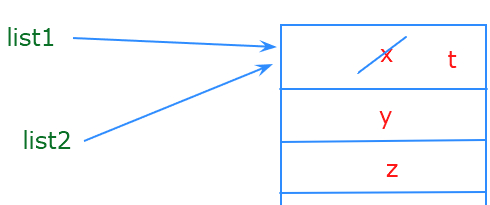

### Clone mutable variables 

So, how can I actually clone a mutable object? 

For **Tuple** and **List**, you can use the built-in `.copy` method.

In [ ]:
list1 = ['x', 'y', 'z']
list2 = list1.copy()

list2[0] = 't'
list1[0] = 'o'

print(f'list1 = {list1}')
print(f'list2 = {list2}') # updating list2 does not affect list1

### Pass mutable and immutable variables into functions

And you should be really careful when you pass mutable variables into your function call. Example below demonstrate the different behaviour for mutable and immultable variables inside a function.

In [ ]:
# integer is immutable
def foo(x): 
    v = 3

x = 1    
foo(x)
print(x)

# list is mutable
def bar(v):
    v[0] = 5
    
y = [1, 2, 3]
bar(y)
print(y)

As we mentioned before, following the functional programming paradigm, <font color='red'>the rule of thumb is that you should simply avoid changing the values of the parameters inside the function</font>. 

---
## Activity 2

<!-- BEGIN QUESTION -->

Please write codes that perform vector addition. For example:
- $[1, 2, 3] + [2, 3, 4] = [1+2, 2+3, 3+4] = [3, 5, 7]$
- $[1, 2] + [3, 4] = [1+3, 2+4] = [4, 6]$


You should provide two different functions:

1. `vec_add_1(v1, v2)`, directly change the value of v1 to v1 + v2
1. `vec_add_2(v1, v2)`, return a new vector with the value of v1 + v2

In [10]:
def vec_add_1(v1, v2):
    # INSERT YOUR CODE
    # ~ 2 lines
    for i in range(len(v1)):
        v1[i] += v2[i]

def vec_add_2(v1, v2):
    v3 = []
    # INSERT YOUR CODE
    # ~ 2 lines
    for i in range(len(v1)):
        v3.append(v1[i] + v2[i])
    return v3

# TEST CASES BELOW
v1 = [1, 2, 3]
v2 = [2, 3, 4]
vec_add_1(v1, v2)
print(v1) # [3, 5, 7]
v = vec_add_2(v1, v2)
print(v) # [5, 8, 11]

v1 = [1, 2, 3, 4, 5, 6]
v2 = [8, 10, 12, 23, 43, 23]
vec_add_1(v1, v2)
print(v1) # [9, 12, 15, 27, 48, 29]
v = vec_add_2(v1, v2)
print(v) # [17, 22, 27, 50, 91, 52]

[3, 5, 7]
[5, 8, 11]
[9, 12, 15, 27, 48, 29]
[17, 22, 27, 50, 91, 52]


<!-- END QUESTION -->

---
## Demo 3

Python provides many convenient features to make your code more compact. You do not necessarily need them to write good code, but they are intuitive to use sometimes and because other programmers might use them, you should also at least understand the syntax. 

Note that you should always prioritize readability of your code. Do not use these features simply to make your code shoter.

### Conditional Expressions

We have been used the `if` and `else` combination a lot, such as

In [ ]:
a = 10
if a % 2 == 0:
    s = 'even'
else:
    s = 'odd'
print(s)

We can simplify these five lines into a single line

In [ ]:
s = 'even' if a%2 == 0 else 'odd'
print(s)

### List Comprehensions 

**List comprehension** provides a succint way to *map* a list to a new one or *filter* a list.

Below is an example where we create a new list that multiplies the value of each element in another list by 2. At `line 9` above, the bracket operators indicate that we are constructing a new list. The expression inside the brackets specifies the elements of the list, and the for clause indicates what sequence we are traversing.

In [ ]:
# ordinary approach
li = [1, 2, 3, 4, 5]
li2 = []
for x in li:
    li2.append(x * 2)
print(li2)

# list comprehension
li = [1, 2, 3, 4, 5]
li2 = [x*2 for x in li] # <- list comprehension
print(li2)

List comprehension can also be used to *filter* a list by adding an `if` statement inside the brackets. The example below filter out the element with odd values in the list.

In [ ]:
# ordinary
li = [1, 2, 3, 4, 5, 6]
li2 = []
for x in li:
    if x % 2 == 0:
        li2.append(x)
print(li2)

# list comprehension
li = [1, 2, 3, 4, 5, 6]
li2 = [x for x in li if x % 2 == 0] # <- carefully compare it with line 4 ~ 6 above. 
print(li2)

---
## Activity 3

<!-- BEGIN QUESTION -->

Can you rewrite the `vec_add_2(v1, v2)` using list comprehension?

**hint**: use the `range` function

In [11]:
def vec_add_2(v1, v2):
    # INSERT YOUR CODE BELOW
    v3 = [v1[i] + v2[i] for i in range(len(v1))]
    return v3

# TEST CASES BELOW
v1 = [1, 2, 3]
v2 = [2, 3, 4]
v = vec_add_2(v1, v2)
print(v) # [3, 5, 7]

v1 = [1, 2, 3, 4, 5, 6]
v2 = [8, 10, 12, 23, 43, 23]
v = vec_add_2(v1, v2)
print(v) # [9, 12, 15, 27, 48, 29]

[3, 5, 7]
[9, 12, 15, 27, 48, 29]


<!-- END QUESTION -->

---
## Submission Exercise

<!-- BEGIN QUESTION -->

Write two list accumultation functions that store the accumulated values inside the list. For example, given a list `[1, 2, 3, 4]`, the `accumulate` function should return a list of `[1, 3, 6, 10]`The $i_{th}$ element in the accmulated list should be the sum of all previous elements including itself, i.e. `acc[i] = list[0] + list[1] + .... + list[i]`
For example, 
- The 1st element `acc[0] = list[0]`
- The 2nd eleemnt `acc[1] = list[0] + list[1]`
- The 3rd element `acc[2] = list[0] + list[1] + list[2]`
- The 4th element `acc[3] = list[0] + list[1] + list[2] + list[3]`
- ...

1. ``list_acc_v1`` changes the value of the list itself
1. ``list_acc_v2`` returns a new list

Note, you <font color='red'>should not </font>use list comprehension here.

In [17]:
def list_acc_v1(li): # modifier that modifies the argument 
    # INSERT YOUR CODE
    # ~ 2 lines
    for i in range(1, len(li)):
        li[i] += li[i - 1]
                        
def list_acc_v2(li): # a pure function that return a new list
    # INSERT YOUR CODE
    # ~ 6 lines
    acc = []
    total = 0
    for num in li:
        total += num
        acc.append(total)
    return acc


# TEST CASES BELOW
list1 = [1, 2, 3, 4]
list_acc_v1(list1)
print(f'{list1}') # this should output [1, 3, 6, 10]

list1 = [1, 2, 3, 4]
list2 = list_acc_v2(list1)
print(f'{list1}{list2}') # this should output [1, 2, 3, 4][1, 3, 6, 10]



[1, 3, 6, 10]
[1, 2, 3, 4][1, 3, 6, 10]


<!-- END QUESTION -->

---
## Extention

### Module and Module Scope

A **module** is a file containing a collection of related functions. For example, the `math` module contains many mathmatical functions, such as `math.log()`, `math.sqrt()` and the `tkinter` module contains many different user interface widgets. Each **module** owns its own scope. So that a varialbe `x` in the **`math` module** will not collide with another varialbe `x` you have defined in the **global** scope.

As a side note, unless you specify otherwise, Python automatically put your variables and functions in to a `__main__` module. 

In [ ]:
# You can get the name of the module scope by the __name__ variable
print(__name__) # main scope

import math
print(math.__name__) # module scope